In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df = df[['v1','v2']]
df.columns = ["label","message"]

In [6]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Data Cleaning & Label Encoding
# encoding 'ham' as 0 and 'spam' as 1 
df['label_num'] = df['label'].map({'ham':0,'spam':1})
df

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
print(df.isna().sum())
df.drop_duplicates(inplace=True)

label        0
message      0
label_num    0
dtype: int64


In [13]:
# Text Processing (NLP)
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string 

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
ps = PorterStemmer()

In [15]:
def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing
df['cleaned'] = df['message'].apply(clean_text)

In [16]:
df

,label,message,label_num,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time tri 2 contact u u å£750 pound prize 2...
5568,ham,Will Ì_ b going to esplanade fr home?,0,ì b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitch act like id interest buy someth els ...


In [18]:
# Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 3000)
x = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label_num']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Training Machine Learning Model (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9758220502901354
[[889   0]
 [ 25 120]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.97      1034



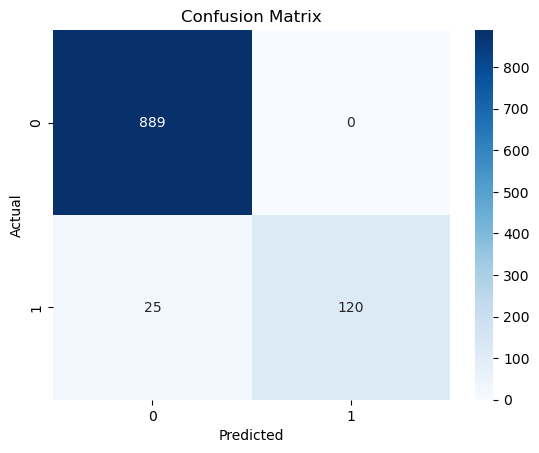

In [26]:
# Visualizing Results
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()